In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from sklearn.metrics import r2_score
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from utils import mri_subject, rdms, load_params, rdm_regression

In [2]:
subject_numbers = load_params.load_subject_numbers('first')
lottery_objs = load_params.load_lotteries()
set_dicts = load_params.load_set_dicts()
behavior_results = load_params.load_behavior_results()
set_objs = load_params.load_sets(behavior_results)
first_subjects, replication_subjects = load_params.load_samples()

with open('../../data/rdms/lottery_attribute_rdm.pkl', 'rb') as f:
    lottery_attribute_rdm = pickle.load(f)
with open('../../data/rdms/lottery_attribute_wo_alex_1st_rdm.pkl', 'rb') as f:
    attribute_without_alex_rdm = pickle.load(f)
with open('../../data/rdms/lottery_alex_1st_rdm.pkl', 'rb') as f:
    alex_rdm = pickle.load(f)

### Plot CV results

In [3]:
with open('../../results/first_results/cv/attribute_cv_rmse.pkl', 'rb') as f:
    attribute_rmse = pickle.load(f)
with open('../../results/replication_results/cv/replication_roi_rmses.pkl', 'rb') as f:
    replication_roi_rmses = pickle.load(f)
with open('../../results/first_results/cv/first_roi_rmses.pkl', 'rb') as f:
    first_roi_rmses = pickle.load(f)
with open('../../results/first_results/cv/first_roi_corrs.pkl', 'rb') as f:
    first_corrs = pickle.load(f)
with open('../../results/first_results/cv/attributes_corrs.pkl', 'rb') as f:
    attribute_corrs = pickle.load(f)
with open('../../results/replication_results/cv/replication_roi_corrs.pkl', 'rb') as f:
    replication_corrs = pickle.load(f)

all_preds = pd.read_csv('../../results/first_results/cv/all_predictions.csv')

In [4]:
FIRST_COLOR = '#8FB4CD'
REPLICATION_COLOR ='#AFECBD'
ATTRIBUTE_COLOR = '#FFBBB8'

In [5]:
def plot_pred_scatter(df):
    label_size = 16
    tick_size = 12
    fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300, sharey=True)
    i = 0
    columns = ['attributes', 'first', 'replication']
    colors = [ATTRIBUTE_COLOR, FIRST_COLOR, REPLICATION_COLOR]
    for ax in axs:
        ax.scatter(df['actual']*100, df[columns[i]]*100, c=colors[i], alpha=0.75)
        ax.set_xlabel('Actual effect', fontsize=label_size)
        if i == 0:
            ax.set_ylabel('Predited effect', fontsize=label_size)
        xticks = ax.get_xticks()
        xticks = [-10, 0, 10, 20]
        xlabels = [str(int(tick))+'%' for tick in xticks]
        ax.set_xticks(ticks=xticks, labels=xlabels, fontsize=tick_size)
        yticks = ax.get_yticks()
        yticks = [-10, 0, 10, 20]
        ylab = [str(int(tick))+'%' for tick in yticks]
        ax.set_yticks(ticks=yticks, labels=ylab, fontsize=tick_size)
        ax.set_ylim([-10, 20])
        ax.set_xlim([-15, 20])
        r = scipy.stats.pearsonr(df['actual'], df[columns[i]])[0]
        r2  = r2_score(df['actual'], df[columns[i]])
        ax.text(-14, 18, f'$r = {r:.4f}, R^2 = {r2:.4f}$', fontsize=tick_size)
        i += 1
    plt.show()

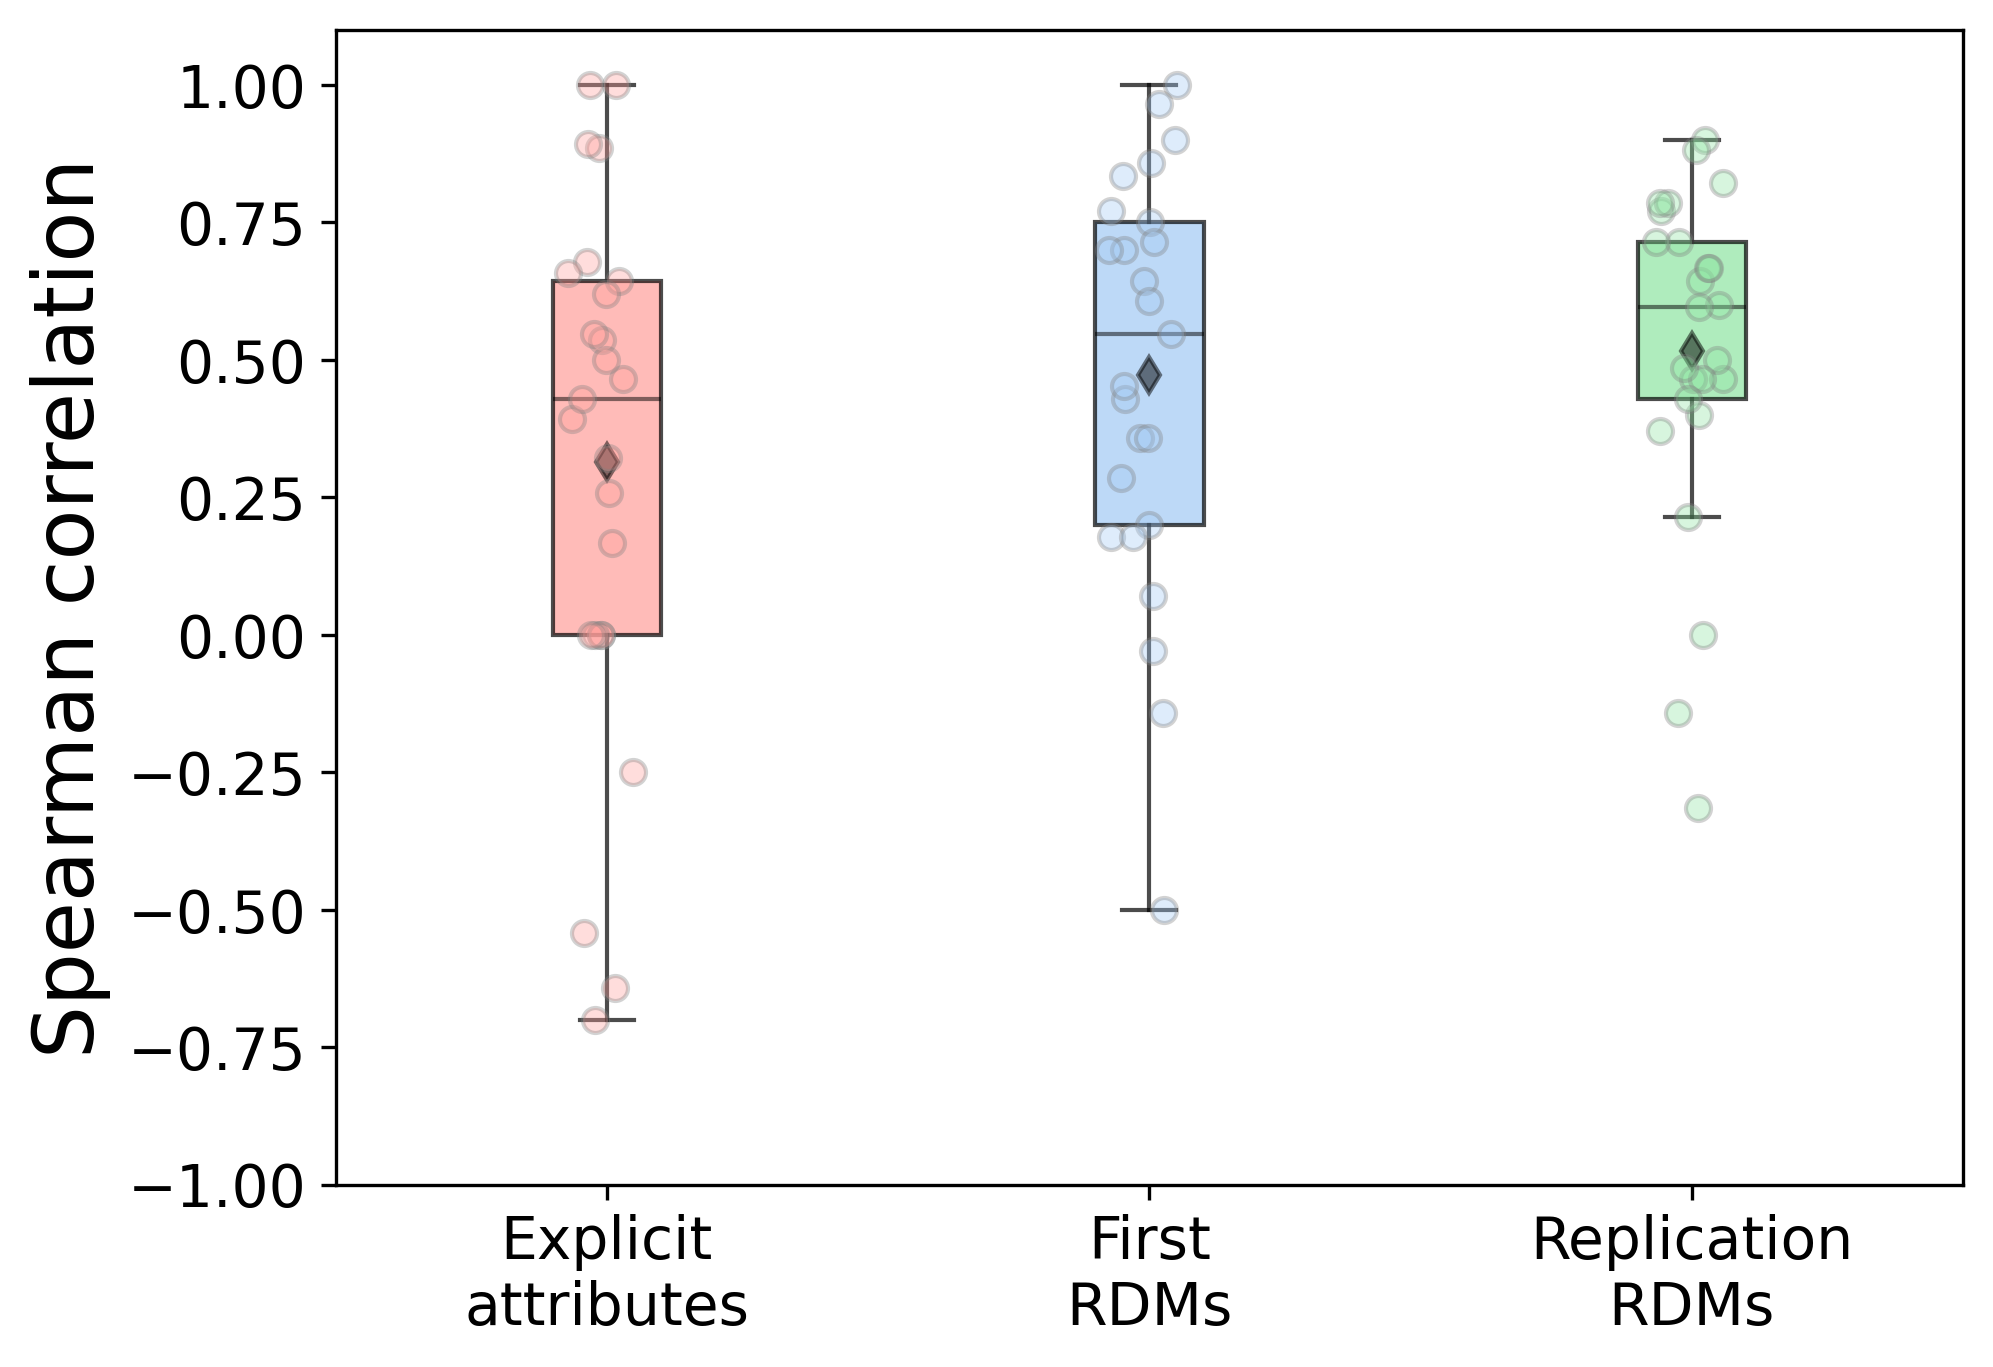

In [6]:
n_models = 3
box_width = 0.2
nudge_magnitude = 0
position_nudge = [nudge_magnitude, nudge_magnitude, 0]
rmse_roi_df = pd.DataFrame({'attributes': attribute_corrs, 'first_RDM': first_corrs, 'replication_RDM': replication_corrs})
model_list = rmse_roi_df.columns.to_list()
bar_colors = np.array(sns.color_palette('pastel6', n_colors=n_models))[[2, 0, 1], :]
roi_props = {'alpha':0.7}
schafer_props = {'alpha':0.3}
plt.figure(figsize=(7, 5), dpi=300)
boxplot_positions = np.arange(0, 3, 1)
roi_boxplot = plt.boxplot(rmse_roi_df, positions=boxplot_positions-position_nudge, widths=box_width, patch_artist=True, 
                            showfliers=False,
                            showmeans=True,
                            meanprops={'marker': 'd', 'color':'black', 'alpha':0.5, 'markerfacecolor':'black', 'markeredgecolor':'black'},
                            medianprops={'color':'black', 'alpha':0.5}, 
                            whiskerprops=roi_props, 
                            capprops=roi_props,
                            boxprops=roi_props, zorder=-1)

plt.ylabel('Spearman correlation', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([-1, 1.1])
# plt.legend([roi_boxplot['means'][0], roi_boxplot['medians'][0]], ['mean', 'median'], loc='lower right')
_ = plt.xticks(boxplot_positions, ['Explicit\nattributes', 'First\nRDMs', 'Replication\nRDMs'])

for patch_roi, color in zip(roi_boxplot['boxes'], bar_colors):
    patch_roi.set_facecolor(color)
i = 0
for _, row in rmse_roi_df.T.iterrows():
    scattered_i = [i-position_nudge[i] + np.random.normal(0, 0.035) for j in range(len(row))]
    plt.scatter(scattered_i, row, alpha=0.35, color=bar_colors[i], edgecolors='grey')
    i += 1
plt.savefig('../../results/figs/fig2/fig2_corrs.png', bbox_inches='tight')

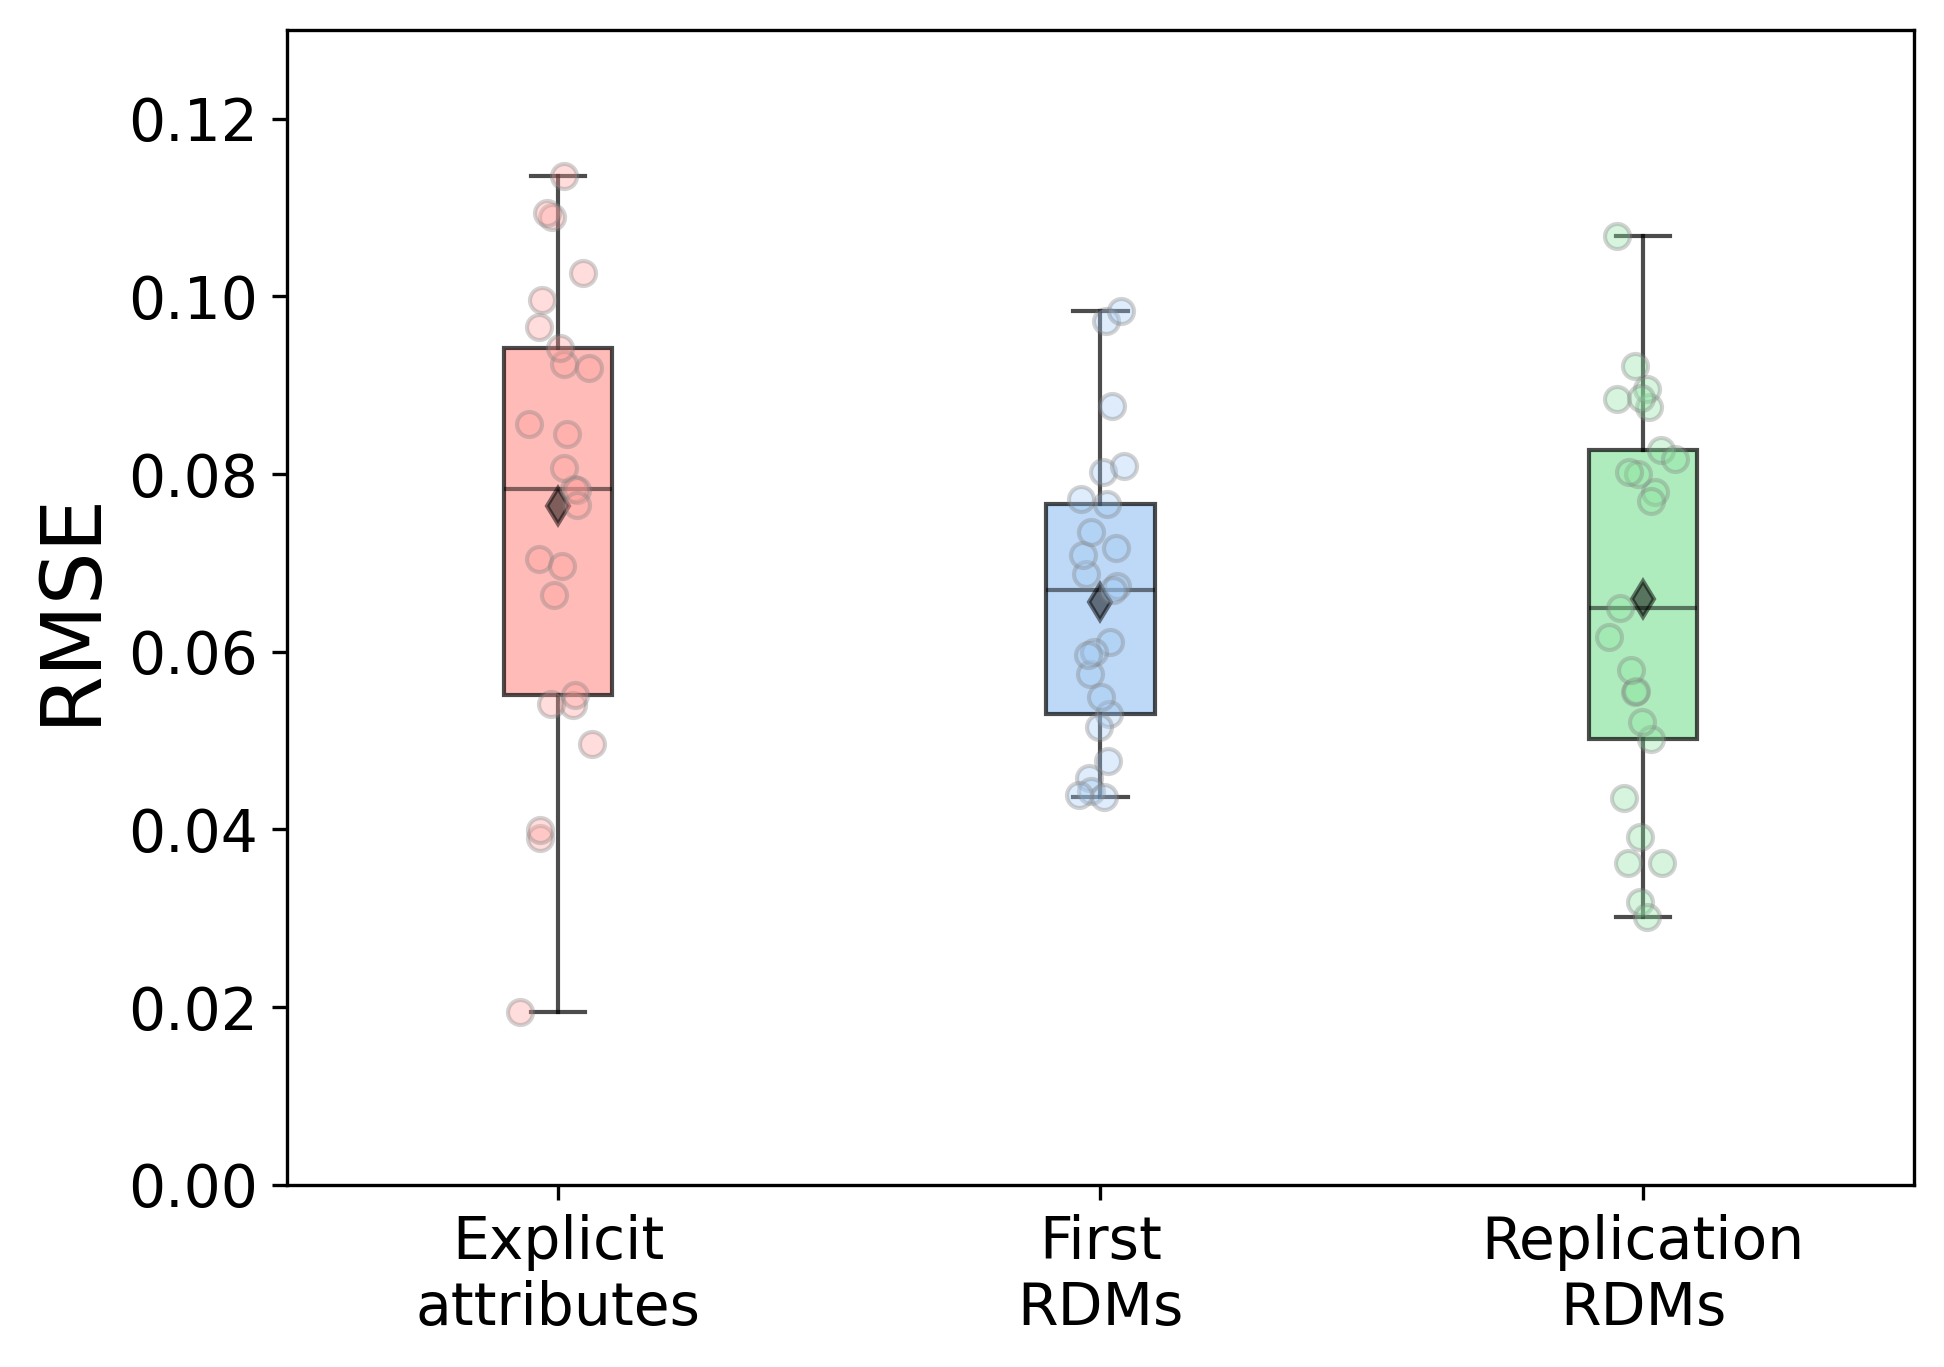

In [7]:
n_models = 3
box_width = 0.2
nudge_magnitude = 0
position_nudge = [nudge_magnitude, nudge_magnitude, 0]
rmse_roi_df = pd.DataFrame({'attributes': attribute_rmse, 'first_RDM': first_roi_rmses, 'replication_RDM': replication_roi_rmses})
model_list = rmse_roi_df.columns.to_list()
bar_colors = np.array(sns.color_palette('pastel6', n_colors=n_models))[[2, 0, 1], :]
roi_props = {'alpha':0.7}
schafer_props = {'alpha':0.3}
plt.figure(figsize=(7, 5), dpi=300)
boxplot_positions = np.arange(0, 3, 1)
roi_boxplot = plt.boxplot(rmse_roi_df, positions=boxplot_positions-position_nudge, widths=box_width, patch_artist=True, 
                            showfliers=False,
                            showmeans=True,
                            meanprops={'marker': 'd', 'color':'black', 'alpha':0.5, 'markerfacecolor':'black', 'markeredgecolor':'black'},
                            medianprops={'color':'black', 'alpha':0.5}, 
                            whiskerprops=roi_props, 
                            capprops=roi_props,
                            boxprops=roi_props, zorder=-1)

plt.ylabel('RMSE', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim([0, 0.13])
_ = plt.xticks(boxplot_positions, ['Explicit\nattributes', 'First\nRDMs', 'Replication\nRDMs'])

for patch_roi, color in zip(roi_boxplot['boxes'], bar_colors):
    patch_roi.set_facecolor(color)
i = 0
for _, row in rmse_roi_df.T.iterrows():
    scattered_i = [i-position_nudge[i] + np.random.normal(0, 0.035) for j in range(len(row))]
    plt.scatter(scattered_i, row, alpha=0.35, color=bar_colors[i], edgecolors='grey')
    i += 1
plt.savefig('../../results/figs/fig2/fig2_main.png', bbox_inches='tight')

In [8]:
with open('../../results/replication_results/cv/replication_random_8_schaefer_rmse.pkl', 'rb') as f:
    replication_random_schaefer_rmses = pickle.load(f)
with open('../../results/first_results/cv/first_random_8_schaefer_rmse.pkl', 'rb') as f:
    first_random_schaefer_rmses = pickle.load(f)

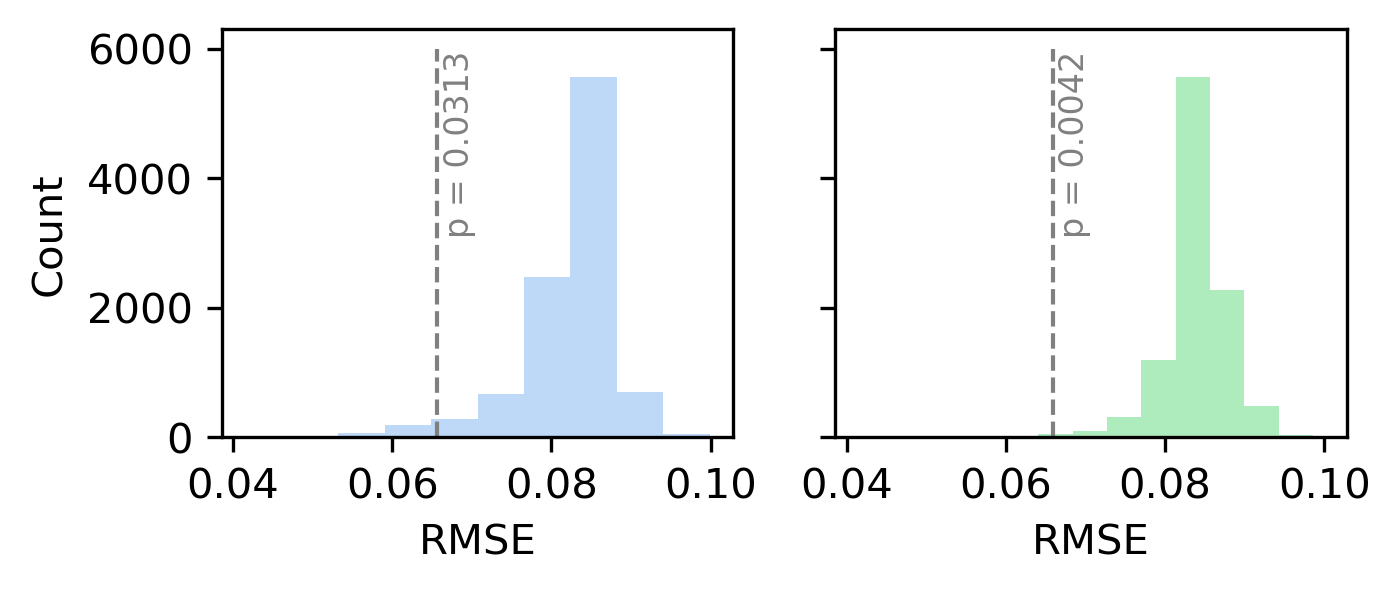

In [9]:
first_rmse = np.mean(first_roi_rmses)
replication_rmse = np.mean(replication_roi_rmses)
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(5, 2), sharey=True, sharex=True)
axs[0].hist(first_random_schaefer_rmses, color='#BDD9F7')
axs[0].vlines(first_rmse, 0, 6000, linestyle='--', color='grey', linewidth=1)
p_first = np.mean(first_random_schaefer_rmses <= first_rmse)
axs[0].text(first_rmse+0.0007, 3200, f'p = {p_first:.4f}', rotation=90, fontsize=8, color='grey')
axs[0].set_xlabel('RMSE')
axs[0].set_ylabel('Count')

axs[1].hist(replication_random_schaefer_rmses, color='#AFECBD')
p_replication = np.mean(replication_random_schaefer_rmses <= replication_rmse)
axs[1].vlines(replication_rmse, 0, 6000, linestyle='--', color='grey', linewidth=1)
axs[1].text(replication_rmse+0.0007, 3200, f'p = {p_replication}', rotation=90, fontsize=8, color='grey')
axs[1].set_xlabel('RMSE')
plt.subplots_adjust(left=0.15, bottom=0.2)
plt.savefig('../../results/figs/fig2/fig2_schaefer_combinations.png')

In [10]:
with open('../../results/replication_results/cv/roi_permutation_rmse.pkl', 'rb') as f:
    replication_permutation_rmses = pickle.load(f)
with open('../../results/first_results/cv/roi_permutation_rmse.pkl', 'rb') as f:
    first_permutation_rmses = pickle.load(f)
with open('../../results/first_results/cv/attributes_permutation_rmse.pkl', 'rb') as f:
    attribute_permutation_rmses = pickle.load(f)

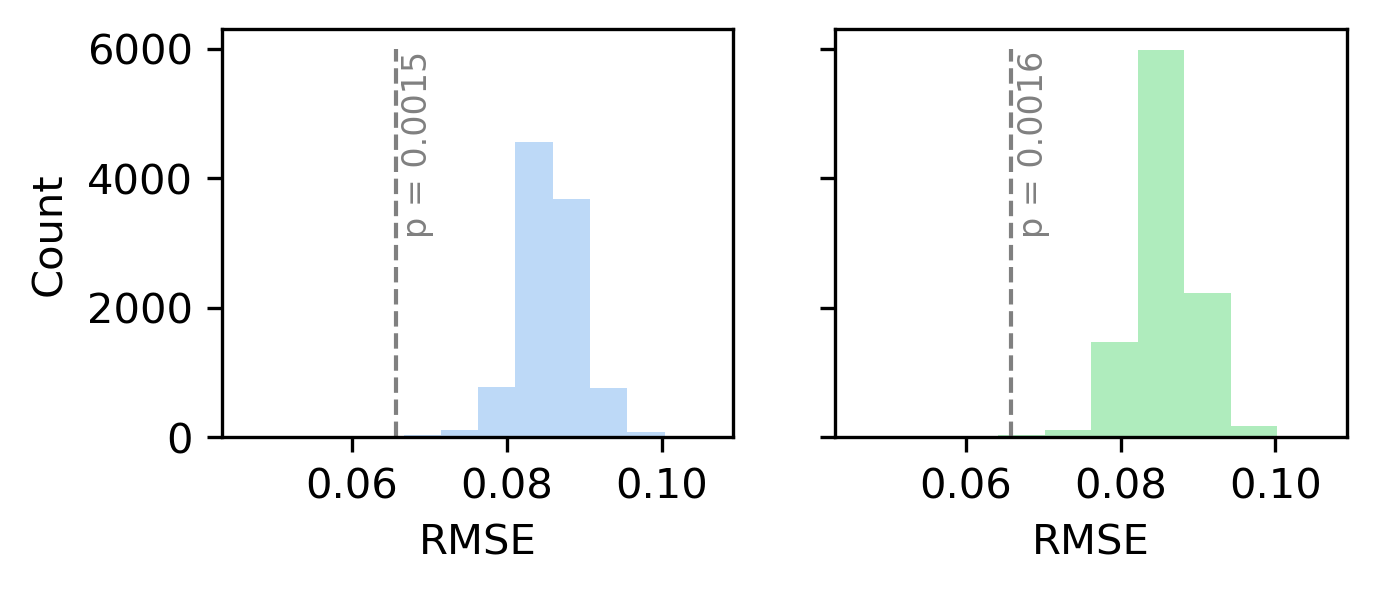

In [11]:
first_rmse = np.mean(first_roi_rmses)
replication_rmse = np.mean(replication_roi_rmses)
fig, axs = plt.subplots(1, 2, dpi=300, figsize=(5, 2), sharey=True, sharex=True)
axs[0].hist(first_permutation_rmses, color='#BDD9F7')
axs[0].vlines(first_rmse, 0, 6000, linestyle='--', color='grey', linewidth=1)
p_first = np.mean(first_permutation_rmses <= first_rmse)
axs[0].text(first_rmse+0.0007, 3200, f'p = {p_first:.4f}', rotation=90, fontsize=8, color='grey')
axs[0].set_xlabel('RMSE')
axs[0].set_ylabel('Count')

axs[1].hist(replication_permutation_rmses, color='#AFECBD')
p_replication = np.mean(replication_permutation_rmses <= replication_rmse)
axs[1].vlines(replication_rmse, 0, 6000, linestyle='--', color='grey', linewidth=1)
axs[1].text(replication_rmse+0.0007, 3200, f'p = {p_replication}', rotation=90, fontsize=8, color='grey')
axs[1].set_xlabel('RMSE')
plt.subplots_adjust(left=0.15, bottom=0.2)
fig.savefig('../../results/figs/fig2/fig2_permutations.png')